In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv(r'C:\Users\muhammadsaif\OneDrive\Desktop\Oasis-Infobyte\Task 2\archive\Unemployment in India.csv')

df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [36]:
print("Dataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

df.columns = df.columns.str.strip()

print("\nCorrected Column Names:")
print(df.columns)

df['Date'] = pd.to_datetime(df['Date'])

df = df.dropna()

print("\nSummary Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 46.2+ KB
None

Missing Values:
Region                                     0
Date                                       0
Frequency 

C:\Users\muhammadsaif\AppData\Local\Temp\ipykernel_1508\22729201.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


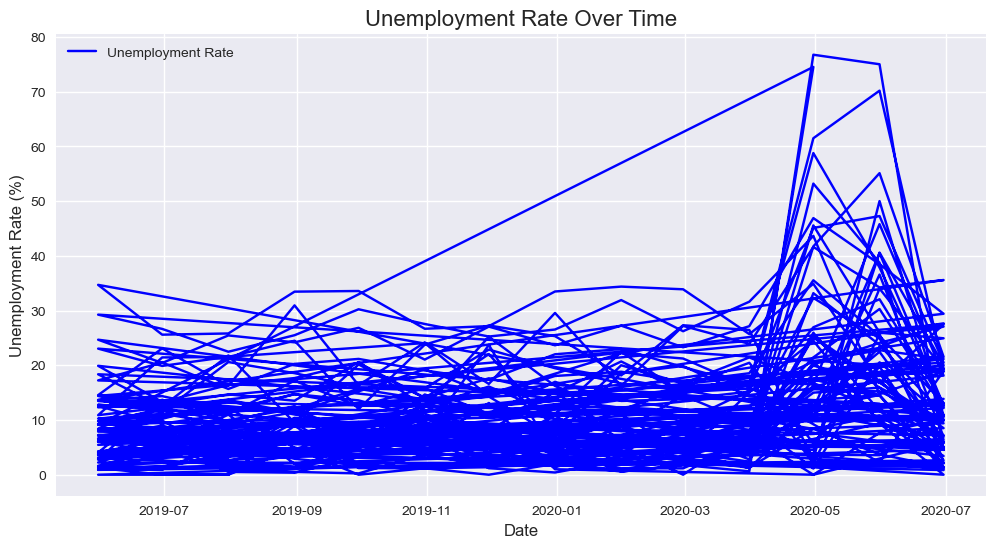

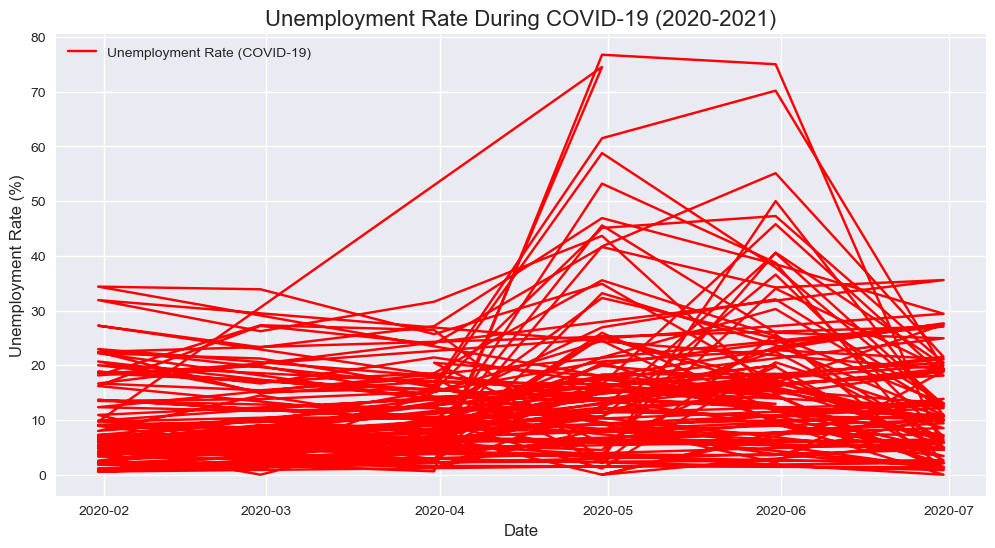

In [37]:
plt.style.use('seaborn')

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Estimated Unemployment Rate (%)'], label='Unemployment Rate', color='blue')
plt.title('Unemployment Rate Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

covid_period = df[(df['Date'] >= '2020-01-01') & (df['Date'] <= '2021-12-31')]
plt.figure(figsize=(12, 6))
plt.plot(covid_period['Date'], covid_period['Estimated Unemployment Rate (%)'], label='Unemployment Rate (COVID-19)', color='red')
plt.title('Unemployment Rate During COVID-19 (2020-2021)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

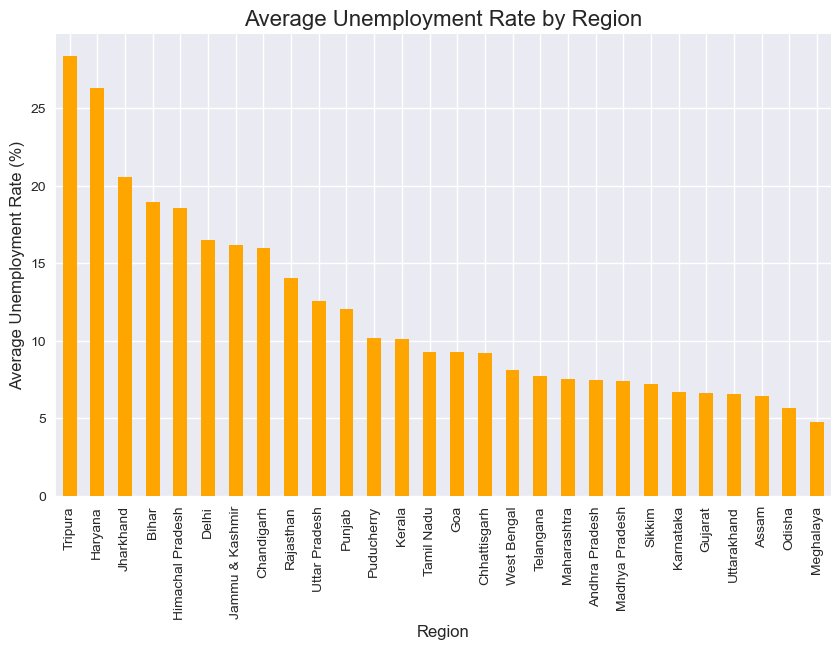

In [38]:
regional_unemployment = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
regional_unemployment.plot(kind='bar', color='orange')
plt.title('Average Unemployment Rate by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Average Unemployment Rate (%)', fontsize=12)
plt.xticks(rotation=90)
plt.show()

Mean Squared Error on Test Set: 126.32
Predicted Unemployment Rate for 2023-01-01: 35.94%


C:\Users\muhammadsaif\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


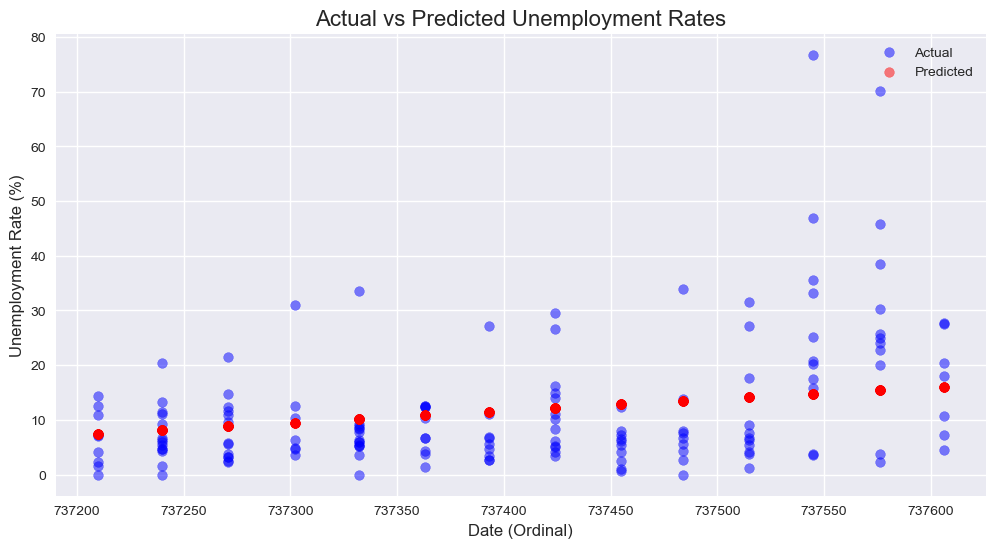

In [39]:
df['Date_Ordinal'] = df['Date'].map(lambda x: x.toordinal())

X = df[['Date_Ordinal']]
y = df['Estimated Unemployment Rate (%)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse:.2f}")

future_date = pd.to_datetime('2023-01-01')
future_date_ordinal = future_date.toordinal()
future_pred = model.predict([[future_date_ordinal]])
print(f"Predicted Unemployment Rate for {future_date.date()}: {future_pred[0]:.2f}%")

plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(X_test, y_pred, color='red', label='Predicted', alpha=0.5)
plt.title('Actual vs Predicted Unemployment Rates', fontsize=16)
plt.xlabel('Date (Ordinal)', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.legend()
plt.show()